# Yulu Case Study - Hypothesis Testing

Submitted By: Soham Suryawanshi    

## About Yulu:
Yulu is a micro-mobility company that operates in several cities worldwide. They provide electric bicycles and electric scooters for short-distance urban transportation. Yulu's mission is to reduce traffic congestion, lower pollution levels, and make urban commuting more efficient and sustainable. Users typically rent Yulu's electric bikes and scooters through a mobile app, which allows for convenient pick-up and drop-off locations throughout the cities they serve. Yulu plays a role in the growing trend of shared mobility services aimed at providing eco-friendly transportation options for urban dwellers.

## Business Problem:

It evolves around understanding the problems faced by the company in the usage of bikes and reasons causing impact such and season,weather, surrounding atmosphere etc. This will help business to understand things to work upon so as to improve the performance and can take actions accordingly.Also proving analysis by doing Hypothesis Testing will help business to take decisions mindfully.

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as spy

In [73]:
df = pd.read_csv("Yulu_data.csv")

In [74]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## Column profiling given:

* datetime: datetime

* season: season (1: spring, 2: summer, 3: fall, 4: winter)

* holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)

* workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
weather:

  1: Clear, Few clouds, partly cloudy, partly cloudy

  2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

  3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

  4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

* temp: temperature in Celsius

* atemp: feeling temperature in Celsius

* humidity: humidity

* windspeed: wind speed

* casual: count of casual users

* registered: count of registered users

* count: count of total rental bikes including both casual and registered

In [75]:
df.shape

(10886, 12)

In [76]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [77]:
df.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [79]:
# Checking null values
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [80]:
# Checking duplicate values
df.duplicated().sum()

0

In [81]:
# Converting the datatype of datetime column from object to datetime
df["datetime"] = pd.to_datetime(df["datetime"])

In [82]:
df.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [83]:
# maximum time to deliver vehicles
df['datetime'].max()

Timestamp('2012-12-19 23:00:00')

In [84]:
# mimimum time to deliver vehicles
df['datetime'].min()

Timestamp('2011-01-01 00:00:00')

In [85]:
# diff time to deliver vehicles
df['datetime'].max() - df['datetime'].min()

Timedelta('718 days 23:00:00')

In [86]:
# extract day from dataset
df['day'] = df['datetime'].dt.day_name()

In [87]:
# extract month from dataset
df['month'] = df['datetime'].dt.month_name()

In [88]:
## extract year from dataset
df['year'] = df['datetime'].dt.year

In [89]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,Saturday,January,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,Saturday,January,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,Saturday,January,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,Saturday,January,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,Saturday,January,2011


In [90]:
df.set_index('datetime', inplace=True)

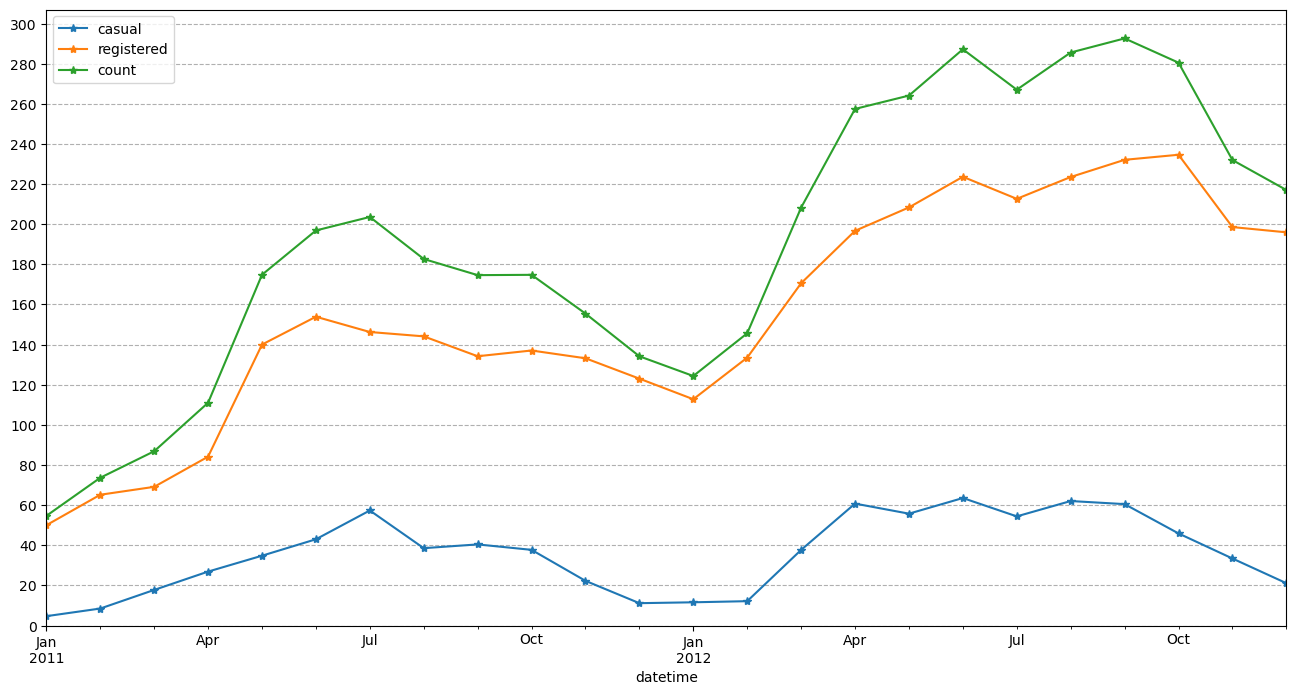

In [67]:
plt.figure(figsize = (16, 8))

# plotting a lineplot by resampling the data on a monthly basis, and calculating the mean value
    # of 'casual', 'registered' and 'count' users for each month
df.resample('M')['casual'].mean().plot(kind = 'line', legend = 'casual', marker = '*')
df.resample('M')['registered'].mean().plot(kind = 'line', legend = 'registered', marker = '*')
df.resample('M')['count'].mean().plot(kind = 'line', legend = 'count', marker = '*')

plt.grid(axis = 'y', linestyle = '--')    # adding gridlines only along the y-axis
plt.yticks(np.arange(0, 301, 20))
plt.ylim(0,)    # setting the lower y-axis limit to 0
plt.show()

In [62]:
# Filter data for the years 2011 and 2012
data_2011 = df[df['year'] == 2011]
data_2012 = df[df['year'] == 2012]

# Calculate the average hourly count for each year
average_count_2011 = round(data_2011['count'].mean(),2)
average_count_2012 = round(data_2012['count'].mean(),2)

# Calculate the percentage increase
percentage_increase = round(((average_count_2012 - average_count_2011) / average_count_2011) * 100,2)

print("Average hourly count in 2011:",average_count_2011)
print("Average hourly count in 2012:",average_count_2012)
print("Percentage increase:",percentage_increase)

Average hourly count in 2011: 144.22
Average hourly count in 2012: 238.56
Percentage increase: 65.41


* This data suggests that there was substantial growth in the count of the variable over the course of one year.

* The mean total hourly count of rental bikes is 144 for the year 2011 and 239 for the year 2012. An annual growth rate of 65.41 % can be seen in the demand of electric vehicles on an hourly basis.

It indicates positive growth and potentially a successful outcome or increasing demand for the variable being measured.

Text(0.5, 1.0, 'Hourly registered of Rental Bikes Over Time')

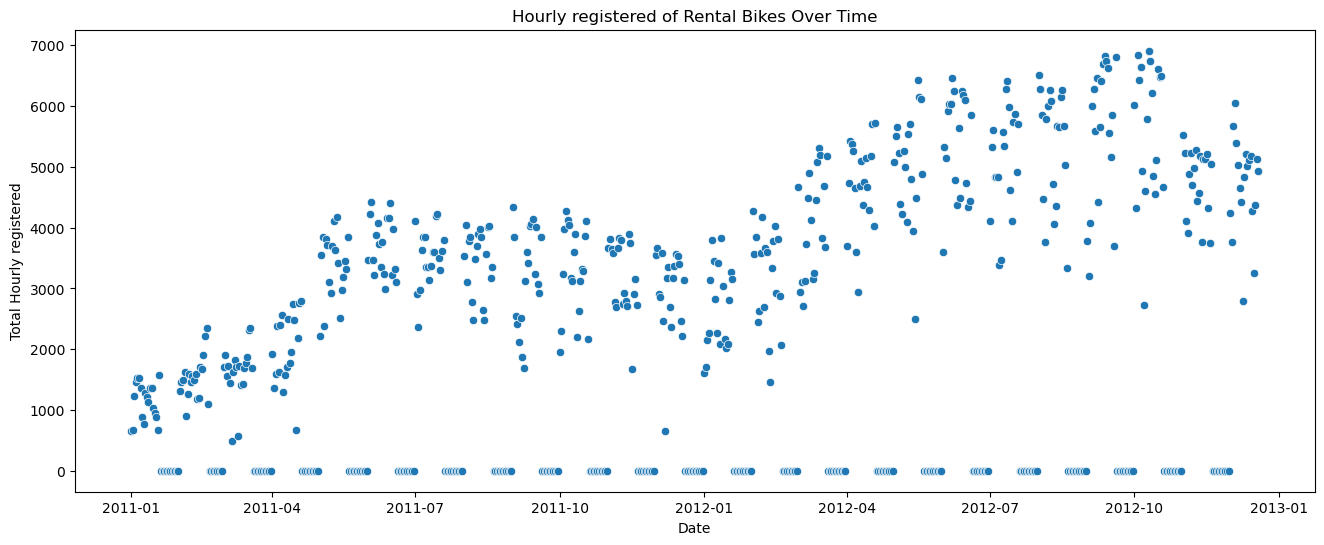

In [101]:
plt.figure(figsize=(16, 6))
plt.subplot(111)
daily_reg = df['registered'].resample('D').sum()

# Plot the data

sns.scatterplot(data=daily_reg)
plt.xlabel('Date')
plt.ylabel('Total Hourly registered')
plt.title('Hourly registered of Rental Bikes Over Time')

Text(0.5, 1.0, 'Hourly casual of Rental Bikes Over Time')

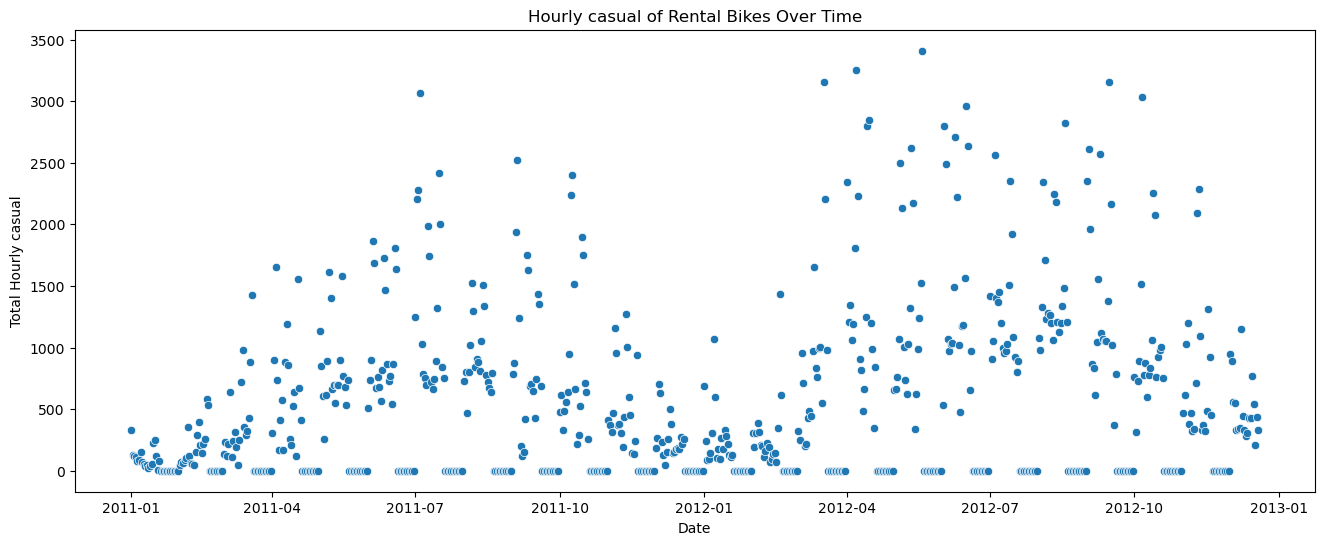

In [102]:
plt.figure(figsize=(16, 6))
daily_casual = df['casual'].resample('D').sum()

# Plot the data

sns.scatterplot(data=daily_casual)
plt.xlabel('Date')
plt.ylabel('Total Hourly casual')
plt.title('Hourly casual of Rental Bikes Over Time')

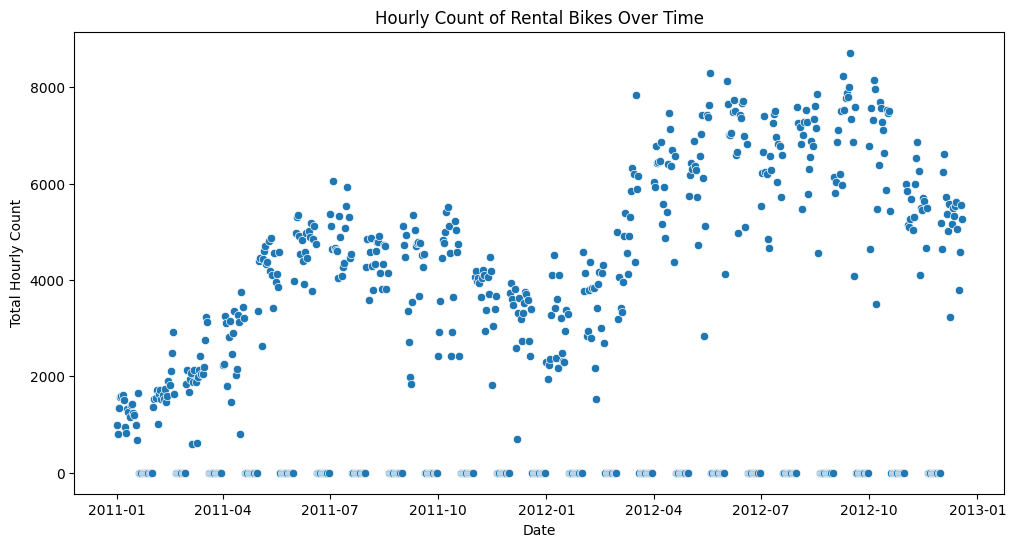

In [27]:
daily_count = df['count'].resample('D').sum()

# Plot the data
plt.figure(figsize=(12, 6))
sns.scatterplot(data=daily_count)
plt.xlabel('Date')
plt.ylabel('Total Hourly Count')
plt.title('Hourly Count of Rental Bikes Over Time')
plt.show()

In [103]:
df.reset_index(inplace = True)

In [29]:
# How does the average hourly count of rental bikes varies for different month ?
# Grouping the DataFrame by the month
df1 = df.groupby(by = df['datetime'].dt.month)['count'].mean().reset_index()
df1.rename(columns = {'datetime' : 'month'}, inplace = True)

# Create a new column 'prev_count' by shifting the 'count' column one position up
    # to compare the previous month's count with the current month's count
df1['prev_count'] = df1['count'].shift(1)

# Calculating the growth percentage of 'count' with respect to the 'count' of previous month
df1['growth_percent'] = (df1['count'] - df1['prev_count']) * 100 / df1['prev_count']
df1.set_index('month', inplace = True)
df1

,count,prev_count,growth_percent
month,,,
1,90.366516,NaN,NaN
2,110.003330,90.366516,21.730188
3,148.169811,110.003330,34.695751
4,184.160616,148.169811,24.290241
5,219.459430,184.160616,19.167406
6,242.031798,219.459430,10.285440
7,235.325658,242.031798,-2.770768
8,234.118421,235.325658,-0.513007
9,233.805281,234.118421,-0.133753


* The count of rental bikes shows an increasing trend from January to March, with a significant growth rate of 34.70% between February and March.
* The growth rate starts to stabilize from April to June, with a relatively smaller growth rate.
* From July to September, there is a slight decrease in the count of rental bikes, with negative growth rates.
* The count further declines from October to December, with the largest drop observed between October and November (-14.94%).

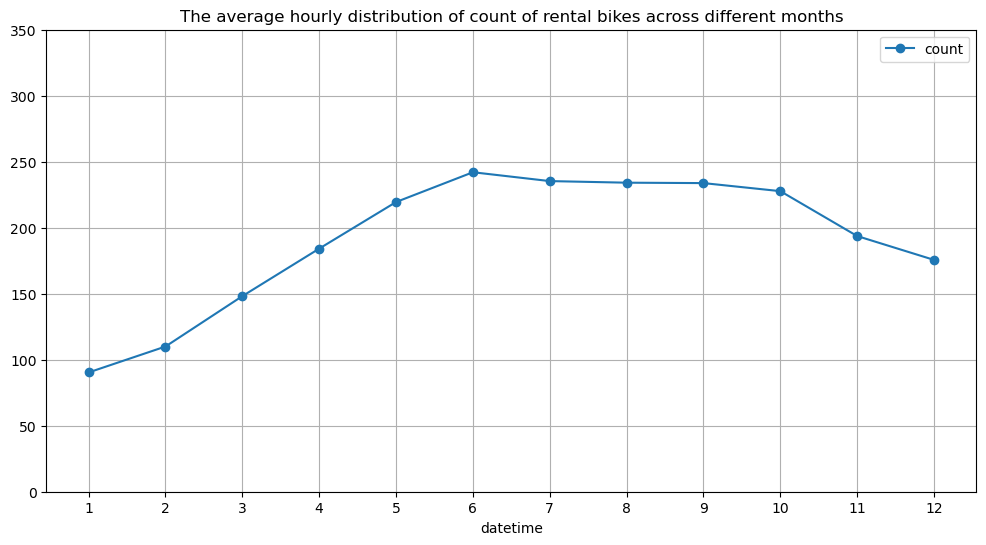

In [152]:
plt.figure(figsize = (12, 6))

# Setting the title for the plot
plt.title("The average hourly distribution of count of rental bikes across different months")

# Grouping the DataFrame by the month and calculating the mean of the 'count' column for each month.
    # Ploting the line graph using markers ('o') to represent the average count per month.
df.groupby(by = df['datetime'].dt.month)['count'].mean().plot(kind = 'line',legend= 'count', marker = 'o')

plt.ylim(0,)    # Setting the y-axis limits to start from zero
plt.xticks(np.arange(1, 13))   # Setting the x-ticks to represent the months from 1 to 12

plt.yticks(np.arange(0, 400, 50))
plt.grid()
plt.show()     # Displaing the plot.

* The average hourly count of rental bikes is the highest in the month of June followed by July and August.
* The average hourly count of rental bikes is the lowest in the month of January followed by February and March.

Overall, these trends suggest a seasonal pattern in the count of rental bikes, with higher demand during the spring and summer months, a slight decline in the fall, and a further decrease in the winter months. It could be useful for the rental bike company to consider these patterns for resource allocation, marketing strategies, and operational planning throughout the year.

In [31]:
# What is the distribution of average count of rental bikes on an hourly basis in a single day ?

# Grouping the DataFrame by the hour
df1 = df.groupby(by = df['datetime'].dt.hour)['count'].mean().reset_index()
df1.rename(columns = {'datetime' : 'hour'}, inplace = True)

# Create a new column 'prev_count' by shifting the 'count' column one position up
    # to compare the previous hour's count with the current hour's count
df1['prev_count'] = df1['count'].shift(1)

# Calculating the growth percentage of 'count' with respect to the 'count' of previous hour
df1['growth_percent'] = (df1['count'] - df1['prev_count']) * 100 / df1['prev_count']
df1.set_index('hour', inplace = True)
df1



,count,prev_count,growth_percent
hour,,,
0,55.138462,NaN,NaN
1,33.859031,55.138462,-38.592718
2,22.899554,33.859031,-32.367959
3,11.757506,22.899554,-48.656179
4,6.407240,11.757506,-45.505110
5,19.767699,6.407240,208.521293
6,76.259341,19.767699,285.777526
7,213.116484,76.259341,179.462793
8,362.769231,213.116484,70.221104


* During the early morning hours (hours 0 to 5), there is a significant decrease in the count, with negative growth percentages ranging from -38.59% to -48.66%.
* However, starting from hour 5, there is a sudden increase in count, with a sharp positive growth percentage of 208.52% observed from hour 4 to hour 5.
* The count continues to rise significantly until reaching its peak at hour 17, with a growth percentage of 48.17% compared to the previous hour.
* After hour 17, there is a gradual decrease in count, with negative growth percentages ranging from -8.08% to -32.99% during the late evening and nighttime hours.

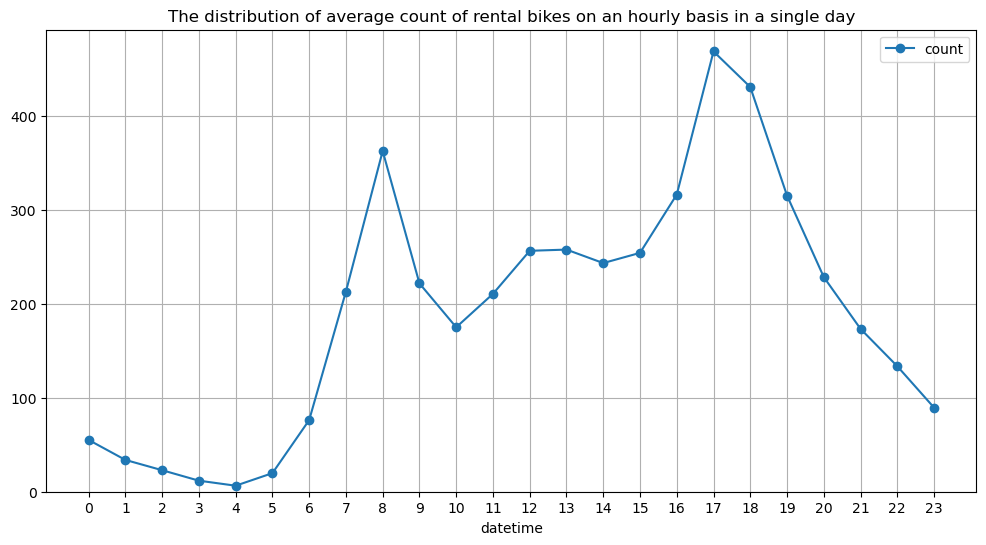

In [107]:
plt.figure(figsize = (12, 6))
plt.title("The distribution of average count of rental bikes on an hourly basis in a single day")
df.groupby(df['datetime'].dt.hour)['count'].mean().plot(kind = 'line',legend= 'count', marker = 'o')
plt.ylim(0,)
plt.xticks(np.arange(0, 24))
plt.grid()
plt.show()

The average count of rental bikes is the highest at 5 PM followed by 6 PM and 8 AM of the day.
The average count of rental bikes is the lowest at 4 AM followed by 3 AM and 5 AM of the day.
These patterns indicate that there is a distinct fluctuation in count throughout the day, with low counts during early morning hours, a sudden increase in the morning, a peak count in the afternoon, and a gradual decline in the evening and nighttime.

In [108]:
# 1: spring, 2: summer, 3: fall, 4: winter
def season_category(x):
    if x == 1:
        return 'spring'
    elif x == 2:
        return 'summer'
    elif x == 3:
        return 'fall'
    else:
        return 'winter'
df['season'] = df['season'].apply(season_category)

In [109]:
# convert the season(int64) to category
df['season'] = df['season'].astype('category')

In [110]:
# convert the holiday(int64) to category
df['holiday'] = df['holiday'].astype('category')

In [111]:
# convert the workingday(int64) to category
df['workingday'] = df['workingday'].astype('category')

In [112]:
# convert the weather(int64) to category
df['weather'] = df['weather'].astype('category')

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  day         10886 non-null  object        
 13  month       10886 non-null  object        
 14  year        10886 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(3), int64(5), object(2)
mem

In [114]:
df.describe()

,temp,atemp,humidity,windspeed,casual,registered,count,year
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,2011.501929
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,0.500019
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,2011.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,2011.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,2012.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,2012.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,2012.000000



**Temperature and "Feels Like" Temperature (atemp):**

* The average temperature (temp) is around 20.23°C, with a standard deviation of 7.79°C.
* The average "feels like" temperature (atemp) is approximately 23.66°C.
* Temperatures vary between 0.82°C and 41°C.

**Humidity and Wind Speed:**

* The average humidity is around 61.89%, with a standard deviation of 19.25%.
* Wind speeds vary between 0 and 56.99 km/h.

**Rental Counts:**

* On average, there are 191.57 rentals per hour.
* Rentals can go as low as 1 and as high as 977 in an hour.
* The median rental count (50th percentile) is 145, indicating a balanced distribution.
**Year Distribution:**

* Data spans from 2011 to 2012.
* About 75% of the data is from the year 2012.
* Yearly trends and changes over time can be analyzed.
**User Types (Casual and Registered):**

* There's difference between casual and registered users, as indicated by the significant difference in the means (casual: 36.02, registered: 155.55).


In [115]:
np.round(df['season'].value_counts(normalize = True) * 100, 2)

winter    25.11
fall      25.11
summer    25.11
spring    24.67
Name: season, dtype: float64

In [116]:
np.round(df['holiday'].value_counts(normalize = True) * 100, 2)

0    97.14
1     2.86
Name: holiday, dtype: float64

In [117]:
np.round(df['workingday'].value_counts(normalize = True) * 100, 2)

1    68.09
0    31.91
Name: workingday, dtype: float64

In [118]:
np.round(df['weather'].value_counts(normalize = True) * 100, 2)

1    66.07
2    26.03
3     7.89
4     0.01
Name: weather, dtype: float64

## Univariate Analysis:

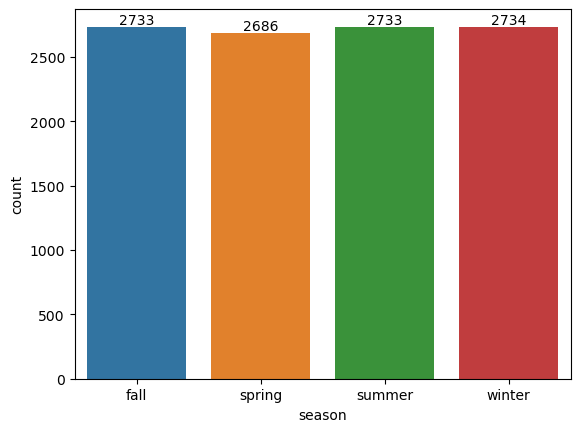

In [119]:
ax= sns.countplot(data = df, x = 'season')
for i in ax.containers:
  ax.bar_label(i)
plt.show()

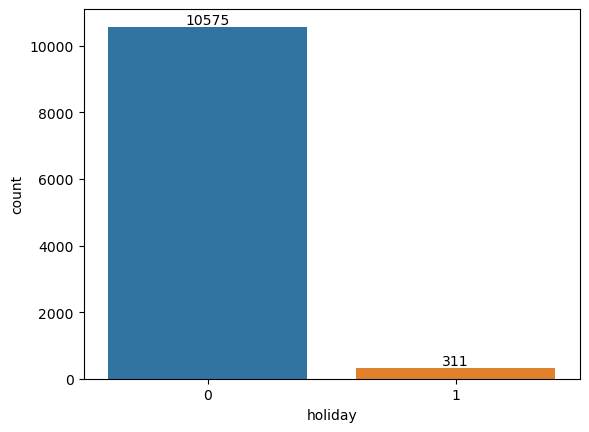

In [120]:
ax= sns.countplot(data = df, x = 'holiday')
for i in ax.containers:
  ax.bar_label(i)

plt.show()

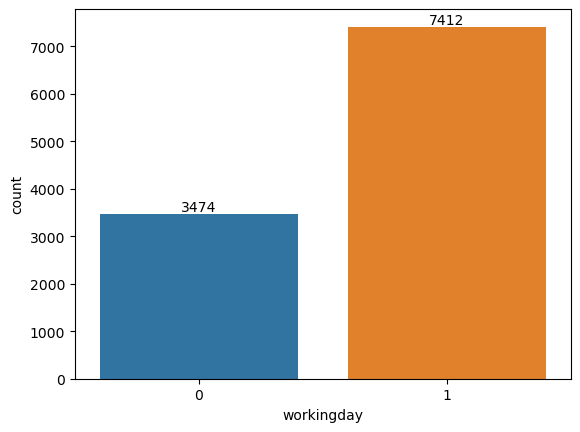

In [121]:
ax = sns.countplot(data = df, x = 'workingday')
for i in ax.containers:
  ax.bar_label(i)
plt.show()

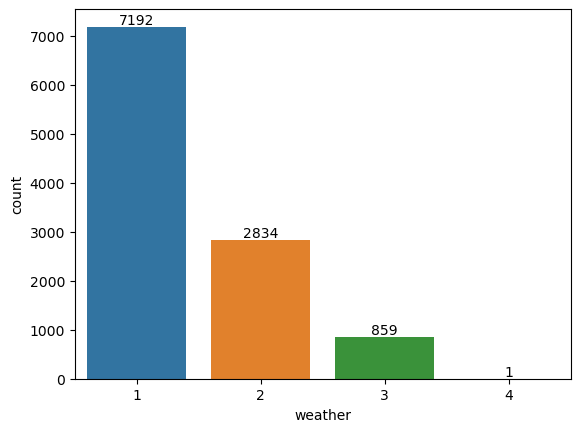

In [122]:
ax = sns.countplot(data = df, x = 'weather')
for i in ax.containers:
  ax.bar_label(i)
plt.show()

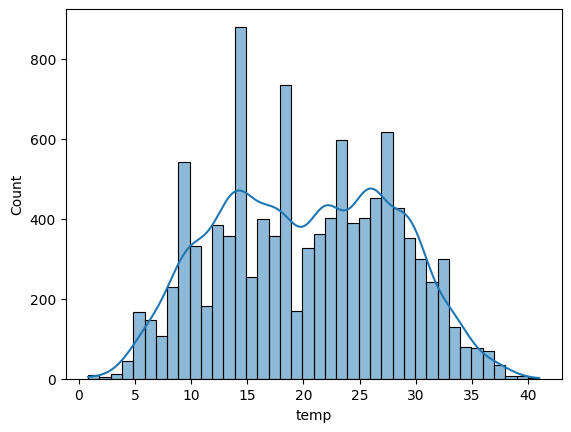

In [52]:
sns.histplot(data = df, x = 'temp', kde = True, bins = 40)
plt.show()

In [53]:
temp_mean = np.round(df['temp'].mean(), 2)
temp_std = np.round(df['temp'].std(), 2)
temp_mean, temp_std

(20.23, 7.79)

* The mean and the standard deviation of the temp column is 20.23 and 7.79 degree celcius respectively.

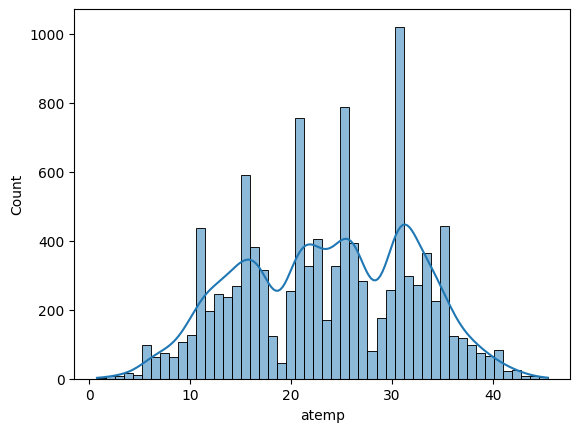

In [55]:
sns.histplot(data = df, x = 'atemp', kde = True, bins = 50)
plt.show()

In [56]:
temp_mean = np.round(df['atemp'].mean(), 2)
temp_std = np.round(df['atemp'].std(), 2)
temp_mean, temp_std

(23.66, 8.47)

* The mean and the standard deviation of the atemp column is 23.66 and 8.47 degree celcius respectively.

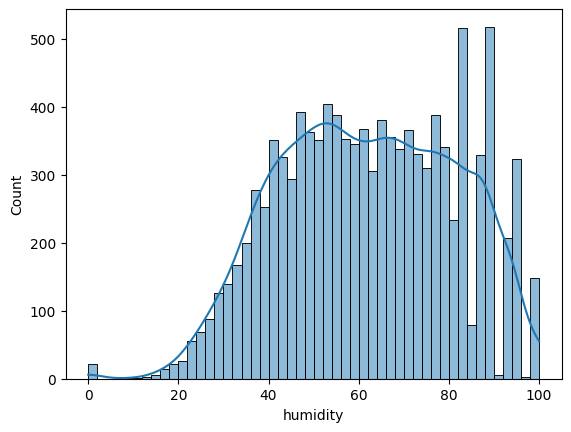

In [58]:
# The below code generates a histogram plot for the 'humidity' feature, showing the distribution of
    # humidity values in the dataset.
sns.histplot(data = df, x = 'humidity', kde = True, bins = 50)
plt.show()

In [59]:
humidity_mean = np.round(df['humidity'].mean(), 2)
humidity_std = np.round(df['humidity'].std(), 2)
humidity_mean, humidity_std

(61.89, 19.25)

* The mean and the standard deviation of the humidity column is 61.89 and 19.25 respectively.

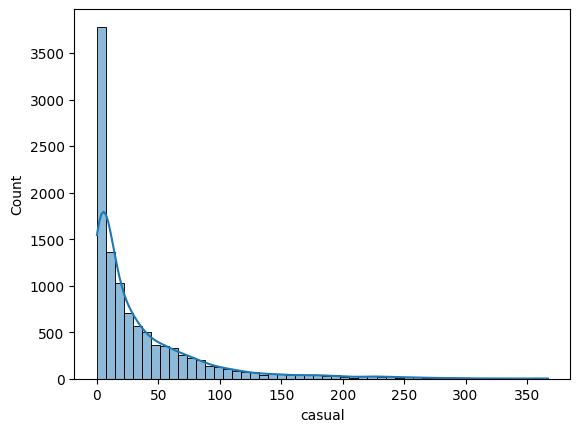

In [63]:
# The below code generates a histogram plot for the 'casual' feature, showing the distribution of
    # casual users' values in the dataset.
sns.histplot(data = df, x = 'casual', kde = True, bins = 50)
plt.show()

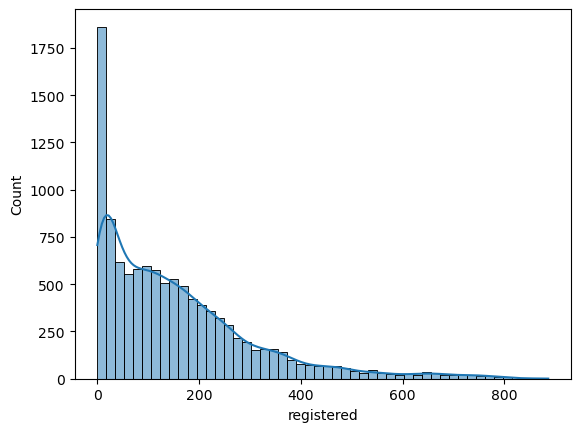

In [123]:
# The below code generates a histogram plot for the 'registered' feature, showing the distribution of
    # registered users' values in the dataset.
sns.histplot(data = df, x = 'registered', kde = True, bins = 50)
plt.show()

# Outliers Detection

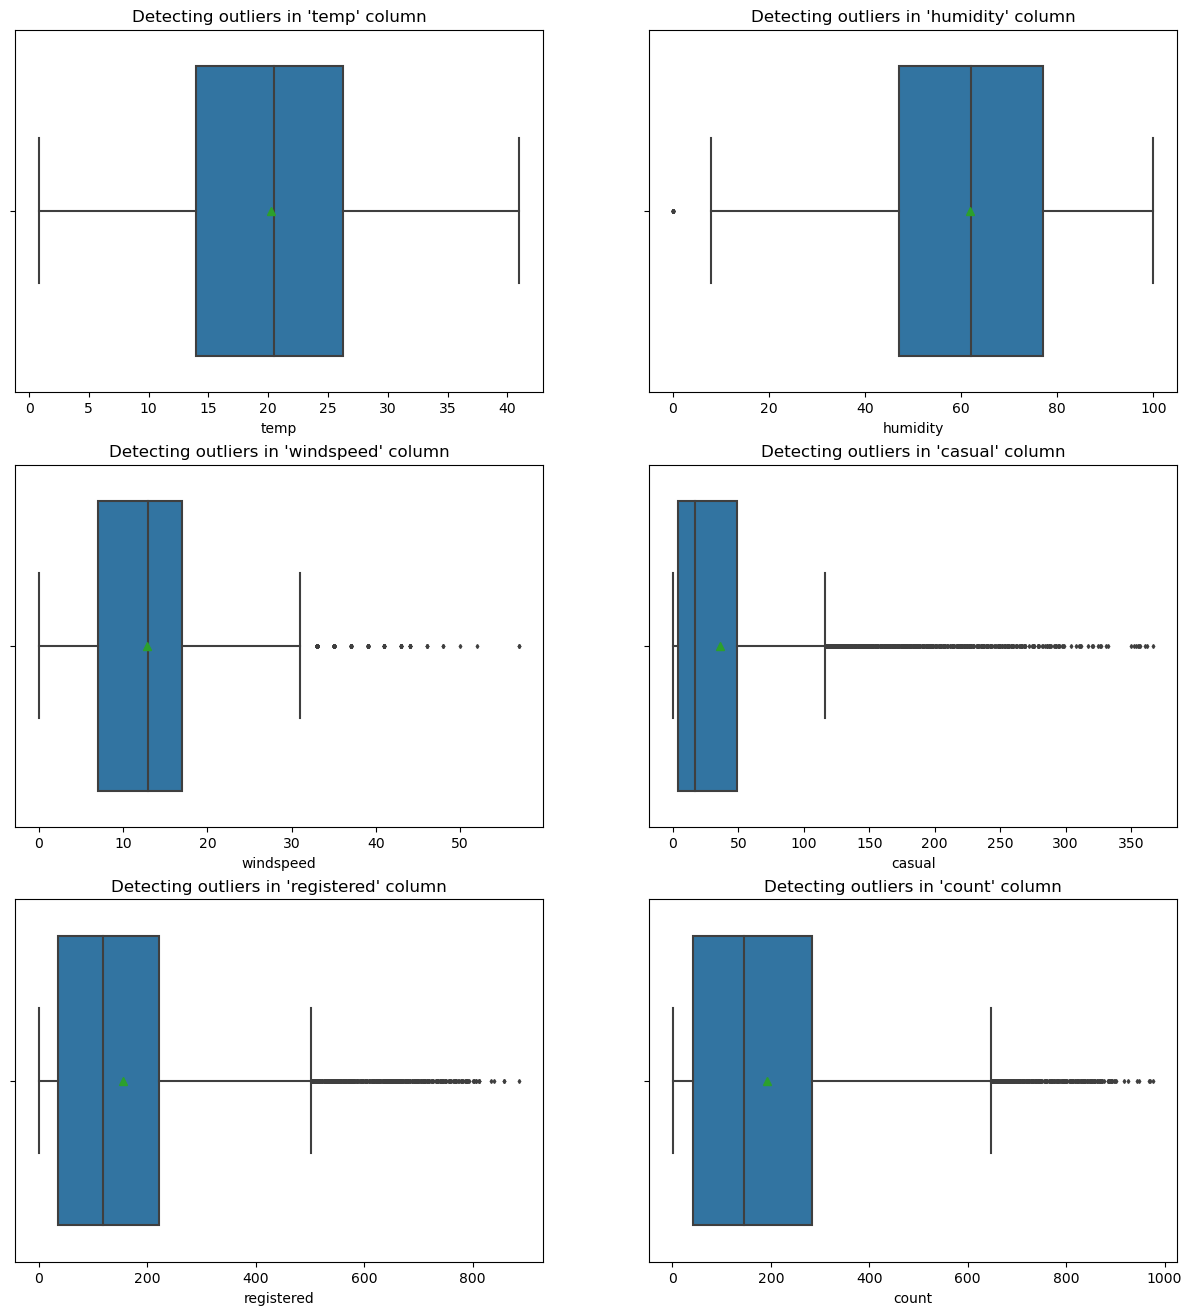

In [125]:
columns = ['temp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
count = 1
plt.figure(figsize = (15, 16))
for i in columns:
    plt.subplot(3, 2, count)
    plt.title(f"Detecting outliers in '{i}' column")
    sns.boxplot(data = df, x = df[i], showmeans = True, fliersize = 2)
    plt.plot()
    count += 1

* There is no outlier in the temp column.
* There are few outliers present in humidity column.
* There are many outliers present in each of the columns : windspeed, casual, registered, count.

# Bivariate Analysis

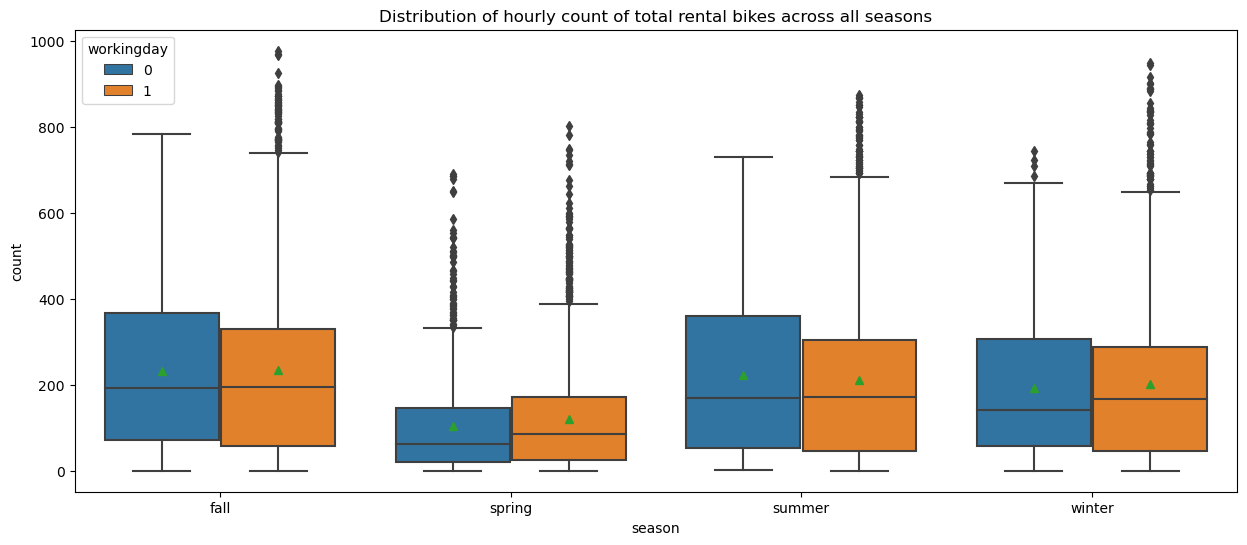

In [127]:
plt.figure(figsize = (15, 6))
plt.title('Distribution of hourly count of total rental bikes across all seasons')
sns.boxplot(data = df, x = 'season', y = 'count', hue = 'workingday', showmeans = True)
plt.show()

* The hourly count of total rental bikes is higher in the fall season, followed by the summer and winter seasons. It is generally low in the spring season.

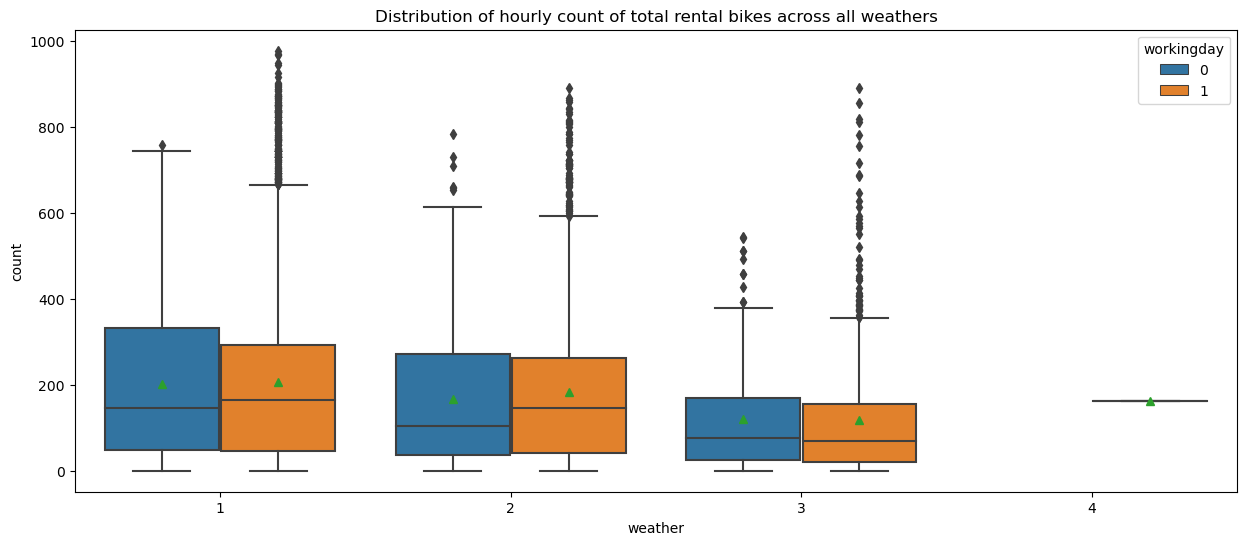

In [128]:
plt.figure(figsize = (15, 6))
plt.title('Distribution of hourly count of total rental bikes across all weathers')
sns.boxplot(data = df, x = 'weather', y = 'count', hue = 'workingday', showmeans = True)
plt.show()

* The hourly count of total rental bikes is higher in the clear and cloudy weather, followed by the misty weather and rainy weather. There are very few records for extreme weather conditions.

In [129]:
# Is there any effect of Working Day on the number of electric cycles rented ?
df.groupby('workingday')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,3474.0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,7412.0,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


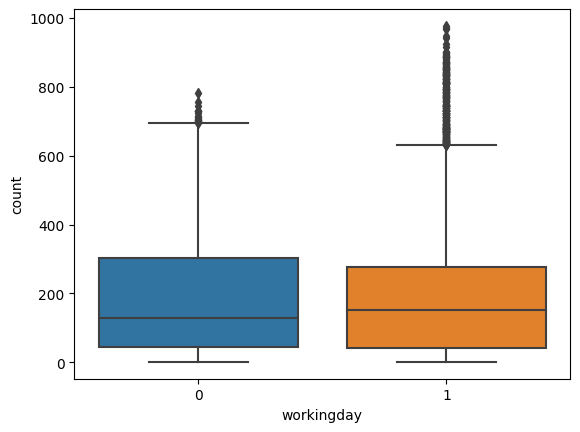

In [ ]:
sns.boxplot(data = df, x = 'workingday', y = 'count')
plt.show()

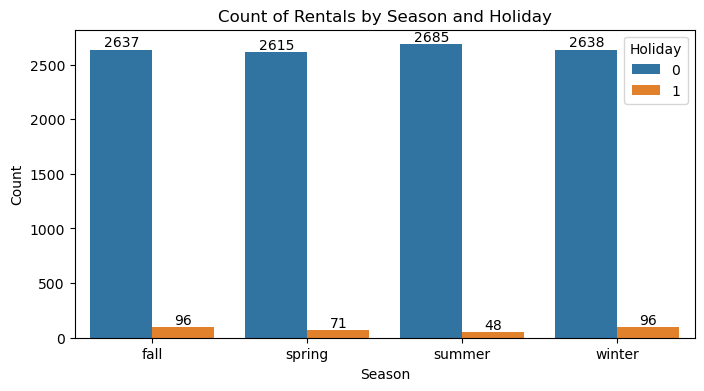

In [149]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(data=df, x='season', hue='holiday')
plt.title('Count of Rentals by Season and Holiday')
plt.xlabel('Season')
plt.ylabel('Count')
plt.legend(title='Holiday', loc='upper right')
for bars in ax.containers:
  ax.bar_label(bars)
plt.show()

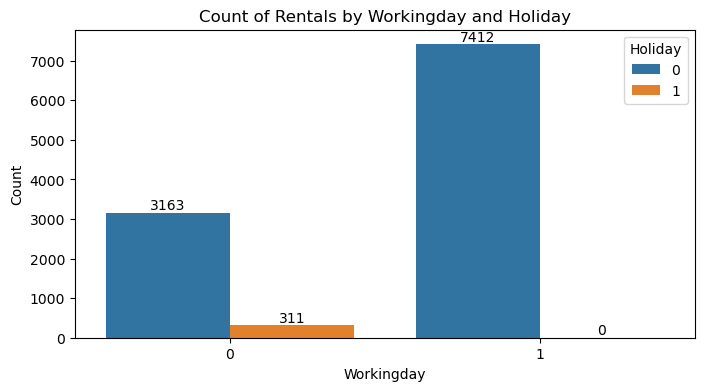

In [150]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(data=df, x='workingday', hue='holiday')
plt.title('Count of Rentals by Workingday and Holiday')
plt.xlabel('Workingday')
plt.ylabel('Count')
plt.legend(title='Holiday', loc='upper right')
for bars in ax.containers:
  ax.bar_label(bars)
plt.show()

## Hypothesis Testing:


*STEP-1* : Set up Null Hypothesis
* Null Hypothesis ( H0 ) - Holidays have no effect on the number of electric vehicles rented

* Alternate Hypothesis ( HA ) - Holidays has some effect on the number of electric vehicles rented

*STEP-2* : Checking for basic assumpitons for the hypothesis


---

* Distribution check using QQ Plot
* Homogeneity of Variances using Levene's test

*STEP-3*: Define Test statistics; Distribution of T under H0.


---

* If the assumptions of T Test are met then we can proceed performing T Test for independent samples else we will perform the non parametric test equivalent to T Test for independent sample i.e., Mann-Whitney U rank test for two independent samples.

*STEP-4*: Compute the p-value and fix value of alpha.


---
* We set our *alpha to be 0.05*
*STEP-5*: Compare p-value and alpha.

---

* Based on p-value, we will accept or reject H0.

    1.   p-val > alpha : Accept H0
    2.   p-val < alpha : Reject H0


 *Visual Tests to know if the samples follow normal distribution*

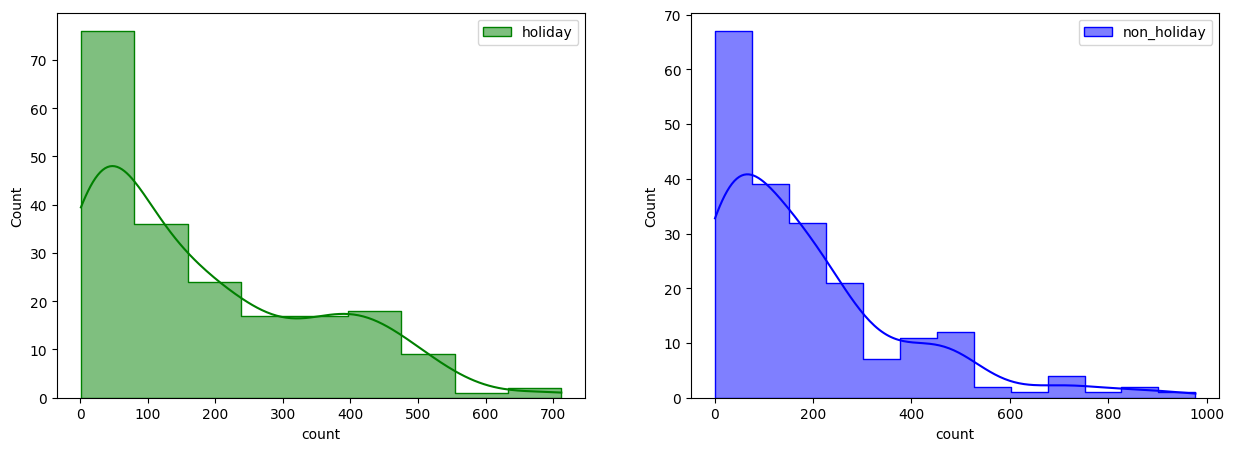

In [75]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df.loc[df['holiday'] == 1, 'count'].sample(200),
             element = 'step', color = 'green', kde = True, label = 'holiday')
plt.legend()
plt.subplot(1, 2, 2)
sns.histplot(df.loc[df['holiday'] == 0, 'count'].sample(200),
             element = 'step', color = 'blue', kde = True, label = 'non_holiday')
plt.legend()
plt.show()

* It can be inferred from the above plot that the distributions do not follow normal distribution.

*Distribution check using QQ Plot*

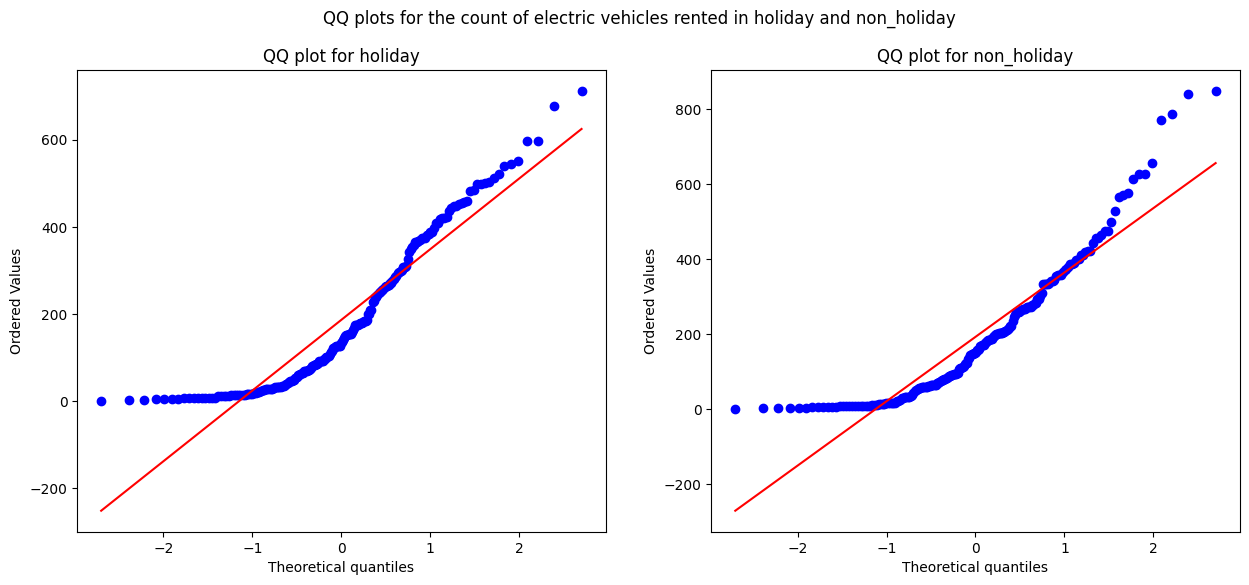

In [76]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
plt.suptitle('QQ plots for the count of electric vehicles rented in holiday and non_holiday')
spy.probplot(df.loc[df['holiday'] == 1, 'count'].sample(200), plot = plt, dist = 'norm')
plt.title('QQ plot for holiday')
plt.subplot(1, 2, 2)
spy.probplot(df.loc[df['holiday'] == 0, 'count'].sample(200), plot = plt, dist = 'norm')
plt.title('QQ plot for non_holiday')
plt.show()

* It can be inferred from the above plot that the distributions do not follow normal distribution.

It can be seen from the above plots that the samples do not come from normal distribution.
* Applying Shapiro-Wilk test for normality
   H0 : The sample follows normal distribution
   H1 : The sample does not follow normal distribution

alpha = 0.05

Test Statistics : **Shapiro-Wilk test for normality**

In [77]:
test_stat, p_value = spy.shapiro(df.loc[df['holiday'] == 1, 'count'].sample(200))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.4439152651313236e-10
The sample does not follow normal distribution


In [78]:
test_stat, p_value = spy.shapiro(df.loc[df['holiday'] == 0, 'count'].sample(200))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 2.318192166006483e-11
The sample does not follow normal distribution


*Transforming the data using boxcox transformation and checking if the transformed data follows normal distribution.*

In [79]:
transformed_holiday = spy.boxcox(df.loc[df['holiday'] == 1, 'count'])[0]
test_stat, p_value = spy.shapiro(transformed_holiday)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 2.1349286782879062e-07
The sample does not follow normal distribution


In [80]:
transformed_non_holiday = spy.boxcox(df.loc[df['holiday'] == 0, 'count'].sample(5000))[0]
test_stat, p_value = spy.shapiro(transformed_non_holiday)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.735895817509823e-25
The sample does not follow normal distribution


* Even after applying the boxcox transformation on each of the "holiday" and "non_holiday" data, the samples do not follow normal distribution.

*Homogeneity of Variances using Levene's test*

In [81]:
# Null Hypothesis(H0) - Homogenous Variance

# Alternate Hypothesis(HA) - Non Homogenous Variance

test_stat, p_value = spy.levene(df.loc[df['holiday'] == 0, 'count'].sample(200),
                                df.loc[df['holiday'] == 1, 'count'].sample(200))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 0.8173270520238873
The samples have Homogenous Variance 


Since the samples are not normally distributed, T-Test cannot be applied here, we can perform its non parametric equivalent test i.e., Mann-Whitney U rank test for two independent samples.

In [82]:
# Ho : No.of electric cycles rented is similar for holidays and non-holidays
# Ha : No.of electric cycles rented is not similar for holidays and non-holidays days
# Assuming significance Level to be 0.05
# Test statistics : Mann-Whitney U rank test for two independent samples

test_stat, p_value = spy.mannwhitneyu(df.loc[df['holiday'] == 0, 'count'].sample(200),
                                      df.loc[df['holiday'] == 1, 'count'].sample(200))
print('P-value :',p_value)
if p_value < 0.05:
    print('No.of electric cycles rented is not similar for holidays and non-holidays days')
else:
    print('No.of electric cycles rented is similar for holidays and non-holidays')

P-value : 0.5235340074108934
No.of electric cycles rented is similar for holidays and non-holidays


P-value : 0.9893031069302215
No.of electric cycles rented is similar for holidays and non-holidays
Therefore, the number of electric cycles rented is statistically similar for both holidays and non - holidays.

Is weather dependent on the season ?

In [83]:
df[['weather', 'season']].describe()

,weather,season
count,10886,10886
unique,4,4
top,1,winter
freq,7192,2734


* It is clear from the above statistical description that both 'weather' and 'season' features are categorical in nature.
*STEP-1* : Set up Null Hypothesis


---


* Null Hypothesis ( H0 ) - weather is independent of season

* Alternate Hypothesis ( HA ) - weather is dependent of seasons.

*STEP-2*: Define Test statistics


---



Since we have two categorical features, the Chi- square test is applicable here. Under H0, the test statistic should follow Chi-Square Distribution.

*STEP-3*: Checking for basic assumptons for the hypothesis (Non-Parametric Test)


---


* The data in the cells should be frequencies, or counts of cases.
* The levels (or categories) of the variables are mutually exclusive. That is, a particular subject fits into one and only one level of each of the variables.
* There are 2 variables, and both are measured as categories.
* The value of the cell expecteds should be 5 or more in at least 80% of the cells, and no cell should have an expected of less than one (3).

*STEP-4*: Compute the p-value and fix value of alpha.


---


we will be computing the chi square-test p-value using the chi2_contingency function using scipy.stats. We set our alpha to be 0.05

*STEP-5*: Compare p-value and alpha.

* Based on p-value, we will accept or reject H0.
               
      1.   H0 :  p-val > alpha : Accept H0

      2.   H1 :  p-val < alpha : Reject H0


                


      

The Chi-square statistic is a non-parametric (distribution free) tool designed to analyze group differences when the dependent variable is measured at a nominal level. Like all non-parametric statistics, the Chi-square is robust with respect to the distribution of the data. Specifically, it does not require equality of variances among the study groups or homoscedasticity in the data.

In [84]:
 # First, finding the contingency table such that each value is the total number of total bikes rented
  # for a particular season and weather
cross_table = pd.crosstab(index = df['season'],
                          columns = df['weather'],
                          values = df['count'],
                          aggfunc = np.sum).replace(np.nan, 0)
cross_table

weather,1,2,3,4
season,,,,
fall,470116,139386,31160,0
spring,223009,76406,12919,164
summer,426350,134177,27755,0
winter,356588,157191,30255,0


* Since the above contingency table has one column in which the count of the rented electric vehicle is less than 5 in most of the cells, we can remove the weather 4 and then proceed further.

In [85]:
cross_table = pd.crosstab(index = df['season'],
                          columns = df.loc[df['weather'] != 4, 'weather'],
                          values = df['count'],
                          aggfunc = np.sum).to_numpy()[:, :3]
cross_table

array([[470116, 139386,  31160],
       [223009,  76406,  12919],
       [426350, 134177,  27755],
       [356588, 157191,  30255]])

In [86]:
chi_test_stat, p_value, dof, expected = spy.chi2_contingency(observed = cross_table)
print('Test Statistic =', chi_test_stat)
print('p value =', p_value)
print('-' * 65)
print("Expected : '\n'", expected)

Test Statistic = 10838.372332480214
p value = 0.0
-----------------------------------------------------------------
Expected : '
' [[453484.88557396 155812.72247031  31364.39195574]
 [221081.86259035  75961.44434981  15290.69305984]
 [416408.3330293  143073.60199337  28800.06497733]
 [385087.91880639 132312.23118651  26633.8500071 ]]


In [87]:
if p_value < 0.05:
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Reject Null Hypothesis


Therefore, there is statistically significant dependency of weather and season based on the number of number of bikes rented.

In [143]:
# Is the number of cycles rented is similar or different in different weather ?
df.groupby(by = 'weather')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
weather,,,,,,,,
1,7192.0,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
2,2834.0,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
3,859.0,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0
4,1.0,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


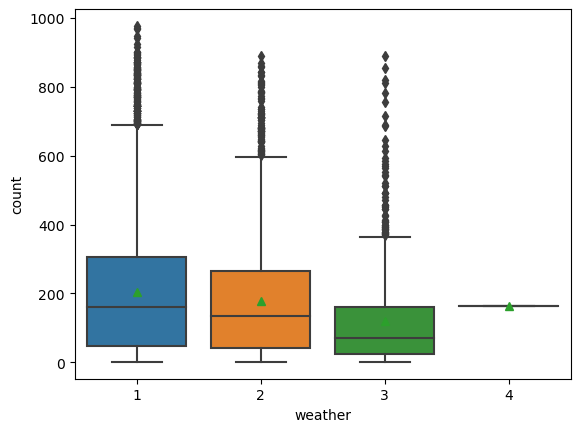

In [144]:
sns.boxplot(data = df, x = 'weather', y = 'count', showmeans = True)
plt.show()

In [145]:
df_weather1 = df.loc[df['weather'] == 1]
df_weather2 = df.loc[df['weather'] == 2]
df_weather3 = df.loc[df['weather'] == 3]
df_weather4 = df.loc[df['weather'] == 4]
len(df_weather1), len(df_weather2), len(df_weather3), len(df_weather4)

(7192, 2834, 859, 1)

*STEP-1* : Set up Null Hypothesis


---



* Null Hypothesis ( H0 ) - Mean of cycle rented per hour is same for weather 1, 2 and 3.
(We wont be considering weather 4 as there in only 1 data point for weather 4 and we cannot perform a ANOVA test with a single data point for a group)

* Alternate Hypothesis ( H1 ) -Mean of cycle rented per hour is not same for season 1,2,3 and 4 are different.
*STEP-2* : Checking for basic assumpitons for the hypothesis


---



Normality check using QQ Plot. If the distribution is not normal, use BOX-COX transform to transform it to normal distribution.

Homogeneity of Variances using Levene's test

Each observations are independent.

*STEP-3: Define Test statistics*


---



The test statistic for a One-Way ANOVA is denoted as F. For an independent variable with k groups, the F statistic evaluates whether the group means are significantly different.

F=MSB / MSW

Under H0, the test statistic should follow F-Distribution.

*STEP-4*: Decide the kind of test.


---



We will be performing right tailed f-test

*STEP-5: Compute the p-value* and fix value of alpha.


---



we will be computing the anova-test p-value using the f_oneway function using scipy.stats. We set our alpha to be 0.05

*STEP-6*: Compare p-value and alpha.


---


Based on p-value, we will accept or reject H0.

      * p-val > alpha : Accept H0
      * p-val < alpha : Reject H0

*Visual Tests to know if the samples follow normal distribution*

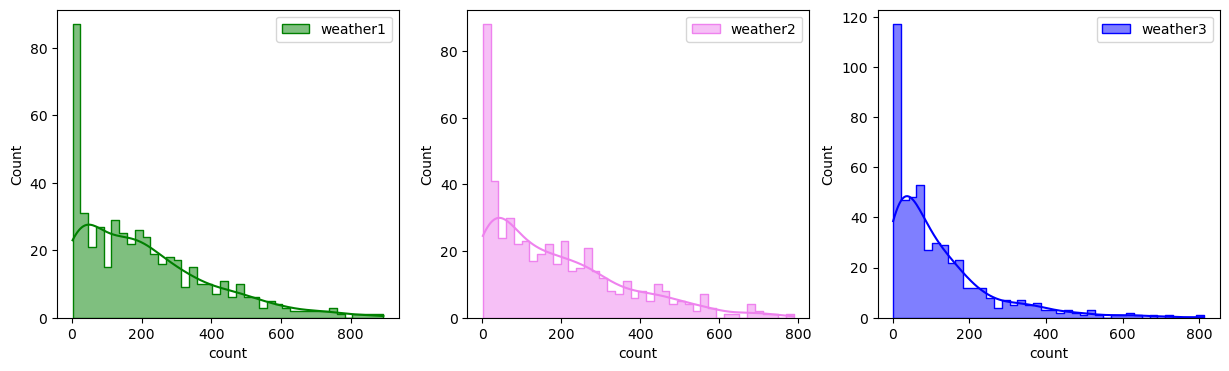

In [147]:
plt.figure(figsize = (15, 4))
plt.subplot(1, 3, 1)
sns.histplot(df_weather1.loc[:, 'count'].sample(500), bins = 40,
             element = 'step', color = 'green', kde = True, label = 'weather1')
plt.legend()
plt.subplot(1, 3, 2)
sns.histplot(df_weather2.loc[:, 'count'].sample(500), bins = 40,
             element = 'step', color = 'violet', kde = True, label = 'weather2')
plt.legend()
plt.subplot(1, 3, 3)
sns.histplot(df_weather3.loc[:, 'count'].sample(500), bins = 40,
             element = 'step', color = 'blue', kde = True, label = 'weather3')
plt.legend()
plt.show()

It can be inferred from the above plot that the distributions do not follow normal distribution.

*Distribution check using QQ Plot*

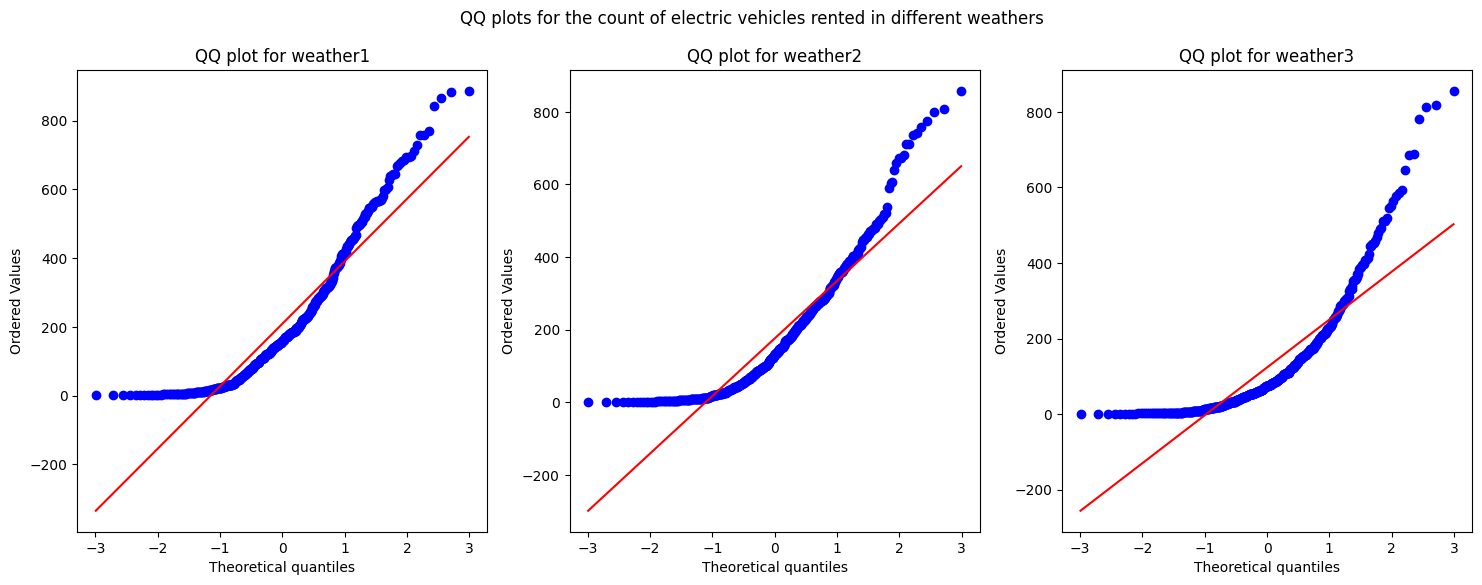

In [92]:
plt.figure(figsize = (18, 6))
plt.subplot(1, 3, 1)
plt.suptitle('QQ plots for the count of electric vehicles rented in different weathers')
spy.probplot(df_weather1.loc[:, 'count'].sample(500), plot = plt, dist = 'norm')
plt.title('QQ plot for weather1')
plt.subplot(1, 3, 2)
spy.probplot(df_weather2.loc[:, 'count'].sample(500), plot = plt, dist = 'norm')
plt.title('QQ plot for weather2')
plt.subplot(1, 3, 3)
spy.probplot(df_weather3.loc[:, 'count'].sample(500), plot = plt, dist = 'norm')
plt.title('QQ plot for weather3')
plt.show()

* It can be inferred from the above plot that the distributions do not follow normal distribution.
* It can be seen from the above plots that the samples do not come from normal distribution.
* Applying Shapiro-Wilk test for normality
    H0: The sample follows normal distribution
    H1 : The sample does not follow normal distribution

alpha = 0.05

Test Statistics : Shapiro-Wilk test for normality

In [93]:
test_stat, p_value = spy.shapiro(df_weather1.loc[:, 'count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 2.3024291109005257e-17
The sample does not follow normal distribution


In [94]:
test_stat, p_value = spy.shapiro(df_weather2.loc[:, 'count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 2.929116342414455e-19
The sample does not follow normal distribution


In [95]:
test_stat, p_value = spy.shapiro(df_weather3.loc[:, 'count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 5.309687937946523e-27
The sample does not follow normal distribution


*Transforming the data using boxcox transformation and checking if the transformed data follows normal distribution.*

In [96]:
transformed_weather1 = spy.boxcox(df_weather1.loc[:, 'count'].sample(5000))[0]
test_stat, p_value = spy.shapiro(transformed_weather1)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 3.2024424745029178e-27
The sample does not follow normal distribution


In [97]:
transformed_weather2 = spy.boxcox(df_weather2.loc[:, 'count'])[0]
test_stat, p_value = spy.shapiro(transformed_weather2)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.9216098393369846e-19
The sample does not follow normal distribution


In [98]:
transformed_weather3 = spy.boxcox(df_weather3.loc[:, 'count'])[0]
test_stat, p_value = spy.shapiro(transformed_weather3)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.4133181593933841e-06
The sample does not follow normal distribution


Even after applying the boxcox transformation on each of the weather data, the samples do not follow normal distribution.

*Homogeneity of Variances using Levene's test*

In [99]:
# Null Hypothesis(H0) - Homogenous Variance

# Alternate Hypothesis(HA) - Non Homogenous Variance

test_stat, p_value = spy.levene(df_weather1.loc[:, 'count'].sample(500),
                                df_weather2.loc[:, 'count'].sample(500),
                                df_weather3.loc[:, 'count'].sample(500))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 9.24423275478366e-16
The samples do not have  Homogenous Variance


Since the samples are not normally distributed and do not have the same variance, f_oneway test cannot be performed here, we can perform its non parametric equivalent test i.e., Kruskal-Wallis H-test for independent samples.

In [101]:
# Ho : Mean no. of cycles rented is same for different weather
# Ha : Mean no. of cycles rented is different for different weather
# Assuming significance Level to be 0.05
alpha = 0.05
test_stat, p_value = spy.kruskal(df_weather1, df_weather2, df_weather3)
print('Test Statistic =', test_stat)
print('p value =', p_value)

Test Statistic = [1.36471292e+01 3.87838808e+01 5.37649760e+00 1.56915686e+01
 1.08840000e+04 3.70017441e+01 4.14298489e+01 1.83168690e+03
 2.80380482e+01 2.84639685e+02 1.73745440e+02 2.04955668e+02
 7.08445555e+01 1.30705553e+01 1.24211405e+01]
p value = [1.08783632e-03 3.78605818e-09 6.79999165e-02 3.91398508e-04
 0.00000000e+00 9.22939752e-09 1.00837627e-09 0.00000000e+00
 8.15859150e-07 1.55338046e-62 1.86920588e-38 3.12206618e-45
 4.13333147e-16 1.45132598e-03 2.00809207e-03]


In [103]:
if p_value.all() < alpha:
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Reject Null Hypothesis


Therefore, the average number of rental bikes is statistically different for different weathers.

In [136]:
# Is the number of cycles rented is similar or different in different season ?
df.groupby(by = 'season')['count'].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
fall,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
spring,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
summer,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
winter,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


In [137]:
df_season_spring = df.loc[df['season'] == 'spring', 'count']
df_season_summer = df.loc[df['season'] == 'summer', 'count']
df_season_fall = df.loc[df['season'] == 'fall', 'count']
df_season_winter = df.loc[df['season'] == 'winter', 'count']
len(df_season_spring), len(df_season_summer), len(df_season_fall), len(df_season_winter)

(2686, 2733, 2733, 2734)

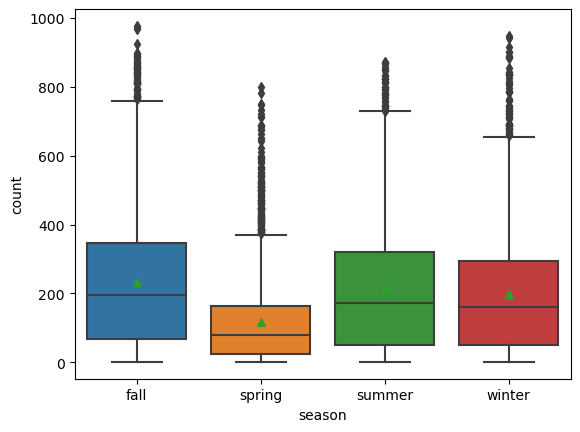

In [138]:
sns.boxplot(data = df, x = 'season', y = 'count', showmeans = True)
plt.show()

*STEP-1* : Set up Null Hypothesis

* Null Hypothesis ( H0 ) - Mean of cycle rented per hour is same for season 1,2,3 and 4.

* Alternate Hypothesis ( HA ) -Mean of cycle rented per hour is different for season 1,2,3 and 4.

*STEP-2* : Checking for basic assumpitons for the hypothesis


---


Normality check using QQ Plot. If the distribution is not normal, use BOX-COX transform to transform it to normal distribution.

Homogeneity of Variances using Levene's test

Each observations are independent.

*STEP-3*: Define Test statistics


---


The test statistic for a One-Way ANOVA is denoted as F. For an independent variable with k groups, the F statistic evaluates whether the group means are significantly different.

F=MSB/MSW

Under H0, the test statistic should follow F-Distribution.

*STEP-4*: Decide the kind of test.


---


We will be performing right tailed f-test

*STEP-5*: Compute the p-value and fix value of alpha.

we will be computing the anova-test p-value using the f_oneway function using scipy.stats. We set our alpha to be 0.05


---


*STEP-6*: Compare p-value and alpha.


---


Based on p-value, we will accept or reject H0. p-val > alpha : Accept H0 p-val < alpha : Reject H0

The one-way ANOVA compares the means between the groups you are interested in and determines whether any of those means are statistically significantly different from each other.

Specifically, it tests the null hypothesis (H0):

*µ1 = µ2 = µ3 = ..... = µk*

where, µ = group mean and k = number of groups.

If, however, the one-way ANOVA returns a statistically significant result, we accept the alternative hypothesis (HA), which is that there are at least two group means that are statistically significantly different from each other.

*Visual Tests to know if the samples follow normal distribution*

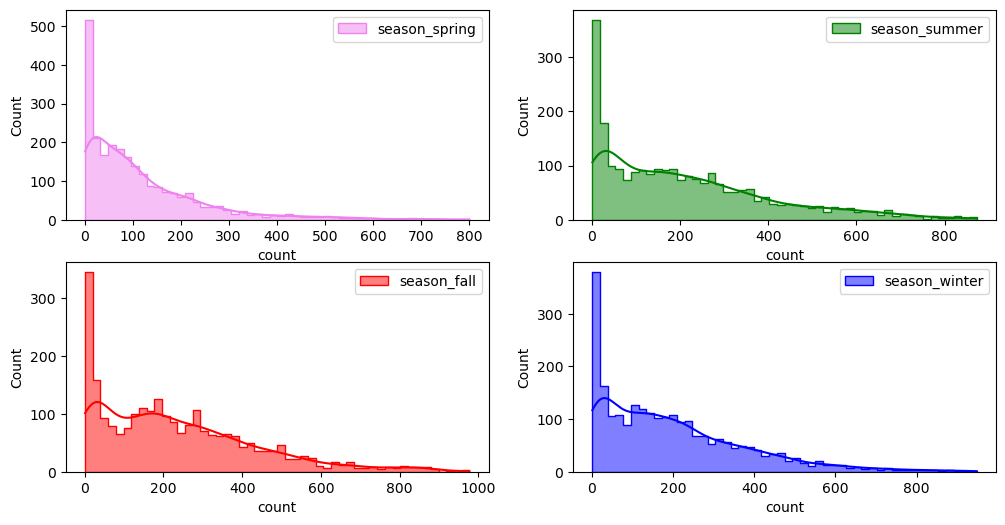

In [141]:
plt.figure(figsize = (12, 6))
plt.subplot(2, 2, 1)
sns.histplot(df_season_spring.sample(2500), bins = 50,
             element = 'step', color = 'violet', kde = True, label = 'season_spring')
plt.legend()
plt.subplot(2, 2, 2)
sns.histplot(df_season_summer.sample(2500), bins = 50,
             element = 'step', color = 'green', kde = True, label = 'season_summer')
plt.legend()
plt.subplot(2, 2, 3)
sns.histplot(df_season_fall.sample(2500), bins = 50,
             element = 'step', color = 'red', kde = True, label = 'season_fall')
plt.legend()
plt.subplot(2, 2, 4)
sns.histplot(df_season_winter.sample(2500), bins = 50,
             element = 'step', color = 'blue', kde = True, label = 'season_winter')
plt.legend()
plt.show()

It can be inferred from the above plot that the distributions do not follow normal distribution.

*Distribution check using QQ Plot*

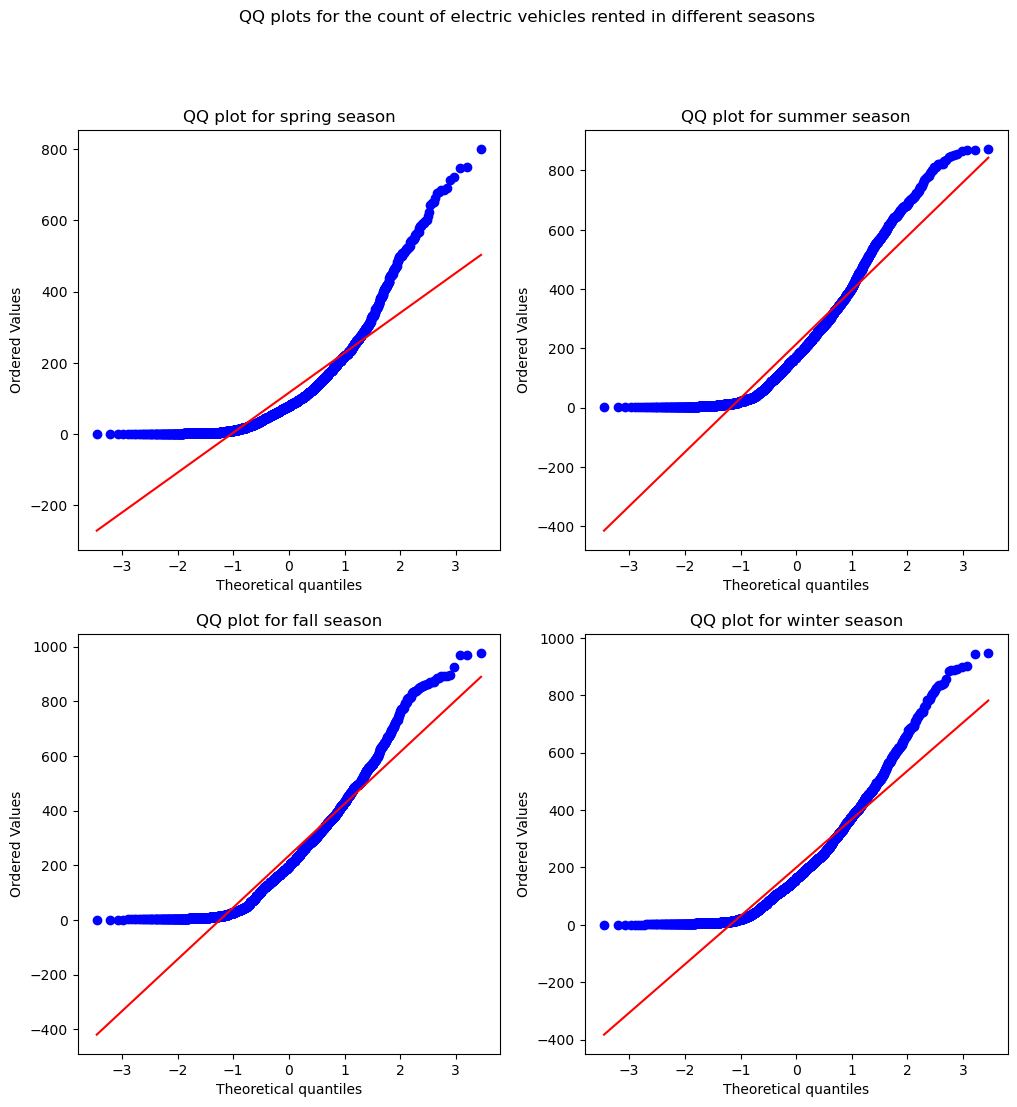

In [142]:
plt.figure(figsize = (12, 12))
plt.subplot(2, 2, 1)
plt.suptitle('QQ plots for the count of electric vehicles rented in different seasons')
spy.probplot(df_season_spring.sample(2500), plot = plt, dist = 'norm')
plt.title('QQ plot for spring season')

plt.subplot(2, 2, 2)
spy.probplot(df_season_summer.sample(2500), plot = plt, dist = 'norm')
plt.title('QQ plot for summer season')

plt.subplot(2, 2, 3)
spy.probplot(df_season_fall.sample(2500), plot = plt, dist = 'norm')
plt.title('QQ plot for fall season')

plt.subplot(2, 2, 4)
spy.probplot(df_season_winter.sample(2500), plot = plt, dist = 'norm')
plt.title('QQ plot for winter season')
plt.show()

* It can be inferred from the above plots that the distributions do not follow normal distribution.
* It can be seen from the above plots that the samples do not come from normal distribution.
* Applying Shapiro-Wilk test for normality
           H0  : The sample follows normal distribution
           H1 : The sample does not follow normal distribution

alpha = 0.05

Test Statistics : Shapiro-Wilk test for normality

In [ ]:
test_stat, p_value = spy.shapiro(df_season_spring.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 0.0
The sample does not follow normal distribution


In [ ]:
test_stat, p_value = spy.shapiro(df_season_summer.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

In [ ]:
test_stat, p_value = spy.shapiro(df_season_fall.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 2.0233423232409764e-35
The sample does not follow normal distribution


In [ ]:
test_stat, p_value = spy.shapiro(df_season_winter.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 3.157212040368908e-38
The sample does not follow normal distribution


p-value 1.686606475037357e-38
The sample does not follow normal distribution
*Transforming the data using boxcox transformation and checking if the transformed data follows normal distribution.*

In [ ]:
transformed_df_season_spring = spy.boxcox(df_season_spring.sample(2500))[0]
test_stat, p_value = spy.shapiro(transformed_df_season_spring)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.2766615576892783e-16
The sample does not follow normal distribution


In [ ]:
transformed_df_season_summer = spy.boxcox(df_season_summer.sample(2500))[0]
test_stat, p_value = spy.shapiro(transformed_df_season_summer)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.6505752986061697e-21
The sample does not follow normal distribution


In [ ]:
transformed_df_season_fall = spy.boxcox(df_season_fall.sample(2500))[0]
test_stat, p_value = spy.shapiro(transformed_df_season_fall)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 4.349576982022727e-21
The sample does not follow normal distribution


In [ ]:
transformed_df_season_winter = spy.boxcox(df_season_winter.sample(2500))[0]
test_stat, p_value = spy.shapiro(transformed_df_season_winter)
print('p-value', p_value)
if p_value < 0.05:
    print('The sample does not follow normal distribution')
else:
    print('The sample follows normal distribution')

p-value 1.1452572782268384e-19
The sample does not follow normal distribution


* Even after applying the boxcox transformation on each of the season data, the samples do not follow normal distribution.

*Homogeneity of Variances using Levene's test*

In [ ]:
# Null Hypothesis(H0) - Homogenous Variance

# Alternate Hypothesis(HA) - Non Homogenous Variance

test_stat, p_value = spy.levene(df_season_spring.sample(2500),
                                df_season_summer.sample(2500),
                                df_season_fall.sample(2500),
                                df_season_winter.sample(2500))
print('p-value', p_value)
if p_value < 0.05:
    print('The samples do not have  Homogenous Variance')
else:
    print('The samples have Homogenous Variance ')

p-value 2.855315269328031e-106
The samples do not have  Homogenous Variance


Since the samples are not normally distributed and do not have the same variance, f_oneway test cannot be performed here, we can perform its non parametric equivalent test i.e., Kruskal-Wallis H-test for independent samples.

In [ ]:
# Ho : Mean no. of cycles rented is same for different weather
# Ha : Mean no. of cycles rented is different for different weather
# Assuming significance Level to be 0.05
alpha = 0.05
test_stat, p_value = spy.kruskal(df_season_spring, df_season_summer, df_season_fall,df_season_winter)
print('Test Statistic =', test_stat)
print('p value =', p_value)

Test Statistic = 699.6668548181988
p value = 2.479008372608633e-151


In [ ]:
if p_value < alpha:
    print('Reject Null Hypothesis')
else:
    print('Failed to reject Null Hypothesis')

Reject Null Hypothesis


Therefore, the average number of rental bikes is statistically different for different seasons.

In [131]:
corr_data = df.corr()
corr_data

C:\Users\Interviewbit\AppData\Local\Temp\ipykernel_20864\919268980.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_data = df.corr()


,temp,atemp,humidity,windspeed,casual,registered,count,year
temp,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.061226
atemp,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.058540
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.078606
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.015221
casual,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.145241
registered,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.264265
count,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000,0.260403
year,0.061226,0.058540,-0.078606,-0.015221,0.145241,0.264265,0.260403,1.000000


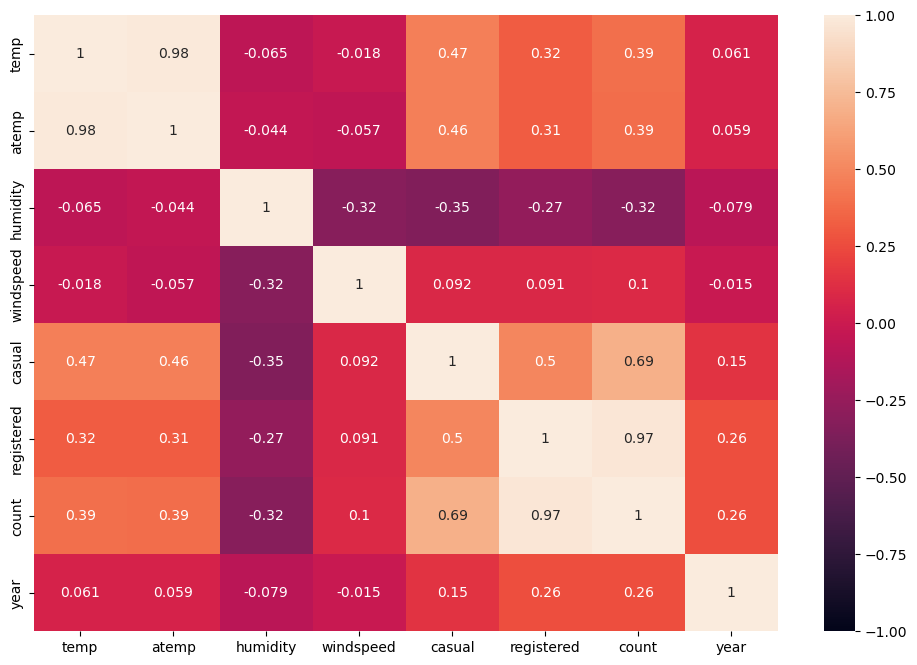

In [134]:
plt.figure(figsize = (12, 8))
sns.heatmap(data = corr_data, annot = True, vmin = -1, vmax = 1)
plt.show()

* Very High Correlation (> 0.9) exists between columns [atemp, temp] and [count, registered]
* High positively / negatively correlation (0.7 - 0.9) does not exist between any columns.
* Moderate positive correlation (0.5 - 0.7) exists between columns [casual, count], [casual, registered].
* Low Positive correlation (0.3 - 0.5) exists between columns [count, temp], [count, atemp], [casual, atemp]
* Negligible correlation exists between all other combinations of columns.

## Insights:

* The data covers almost 2 years, from January 1, 2011, to December 19, 2012.

* Out of every 100 users, around 19 are casual users, and 81 are registered users.

* The average number of bikes rented per hour increased from 144 in 2011 to 239 in 2012, showing a growth rate of 65.41%.

* There is a seasonal pattern in the count of rental bikes, with higher demand during the spring and summer months, a slight decline in the fall, and a further decrease in the winter months.

* The months with the fewest rentals are January, February, and March.

* Rental counts go up in the morning, peak in the afternoon, and then decrease in the evening and at night.

* Most of the time, it's cooler, with temperatures below 28 degrees Celsius.

* Humidity is usually on the higher side, varying from ideal to quite moist conditions.

* Windspeed is generally less than 20 for over 85% of the time.

* Bike rental counts are the highest in clear and cloudy weather, followed by misty and rainy weather. Extreme weather records are rare.

* Bike rental averages are similar on both workdays and weekends.

* Weather conditions and seasons affect bike rentals significantly.

* Different weather types have varying impacts on bike rentals.

* Some weather and season combinations affect bike rentals differently.

* Bike rentals vary across seasons, showing statistically significant differences.






# Recommendations
* **Seasonal Marketing:** Since there is a clear seasonal pattern in the count of rental bikes, Yulu can adjust its marketing strategies accordingly. Focus on promoting bike rentals during the spring and summer months when there is higher demand. Offer seasonal discounts or special packages to attract more customers during these periods.

* **Time-based Pricing:** Take advantage of the hourly fluctuation in bike rental counts throughout the day. Consider implementing time-based pricing where rental rates are lower during off-peak hours and higher during peak hours. This can encourage customers to rent bikes during less busy times, balancing out the demand and optimizing the resources.

* **Weather-based Promotions:** Recognize the impact of weather on bike rentals. Create weather-based promotions that target customers during clear and cloudy weather, as these conditions show the highest rental counts. Yulu can offer weather-specific discounts to attract more customers during these favorable weather conditions.

* **User Segmentation:** Given that around 81% of users are registered, and the remaining 19% are casual, Yulu can tailor its marketing and communication strategies accordingly. Provide loyalty programs, exclusive offers, or personalized recommendations for registered users to encourage repeat business. For casual users, focus on providing a seamless rental experience and promoting the benefits of bike rentals for occasional use.

* **Optimize Inventory:** Analyze the demand patterns during different months and adjust the inventory accordingly. During months with lower rental counts such as January, February, and March, Yulu can optimize its inventory levels to avoid excess bikes. On the other hand, during peak months, ensure having sufficient bikes available to meet the higher demand.

* **Improve Weather Data Collection:** Given the lack of records for extreme weather conditions, consider improving the data collection process for such scenarios. Having more data on extreme weather conditions can help to understand customer behavior and adjust the operations accordingly, such as offering specialized bike models for different weather conditions or implementing safety measures during extreme weather.

* **Customer Comfort:** Since humidity levels are generally high and temperature is often below 28 degrees Celsius, consider providing amenities like umbrellas, rain jackets, or water bottles to enhance the comfort and convenience of the customers. These small touches can contribute to a positive customer experience and encourage repeat business.

* **Collaborations with Weather Services:** Consider collaborating with weather services to provide real-time weather updates and forecasts to potential customers. Incorporate weather information into your marketing campaigns or rental app to showcase the ideal biking conditions and attract users who prefer certain weather conditions.

* **Seasonal Bike Maintenance:** Allocate resources for seasonal bike maintenance. Before the peak seasons, conduct thorough maintenance checks on the bike fleet to ensure they are in top condition. Regularly inspect and service bikes throughout the year to prevent breakdowns and maximize customer satisfaction.

* **Customer Feedback and Reviews:** Encourage customers to provide feedback and reviews on their biking experience. Collecting feedback can help identify areas for improvement, understand customer preferences, and tailor the services to better meet customer expectations.

* **Social Media Marketing:** Leverage social media platforms to promote the electric bike rental services. Share captivating visuals of biking experiences in different weather conditions, highlight customer testimonials, and engage with potential customers through interactive posts and contests. Utilize targeted advertising campaigns to reach specific customer segments and drive more bookings.

* **Special Occasion Discounts:** Since Yulu focusses on providing a sustainable solution for vehicular pollution, it should give special discounts on the occassions like Zero Emissions Day (21st September), Earth day (22nd April), World Environment Day (5th June) etc in order to attract new users.